In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim


In [2]:
train_dir = "/kaggle/input/intel-image-classification/seg_train/seg_train"
test_dir = "/kaggle/input/intel-image-classification/seg_test/seg_test"


In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2,
                                   height_shift_range=0.2, horizontal_flip=True, validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load train & validation sets
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                    batch_size=32, class_mode='categorical', subset='training')

val_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='categorical', subset='validation')

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150, 150),
                                                  batch_size=32, class_mode='categorical')

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [4]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,036,742 (72.62 MB)

 Trainable params: 19,036,742 (72.62 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
x_batch, y_batch = next(train_generator)
print(f"Sample input shape: {x_batch.shape}")
print(f"Sample label shape: {y_batch.shape}")


Sample input shape: (32, 150, 150, 3)
Sample label shape: (32, 6)


In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150, 150), batch_size=32, class_mode='categorical', subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(150, 150), batch_size=32, class_mode='categorical'
)


Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [7]:
import os

# List the directories inside training folder
print("Training classes:", os.listdir(train_dir))
print("Testing classes:", os.listdir(test_dir))


Training classes: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']
Testing classes: ['mountain', 'street', 'buildings', 'sea', 'forest', 'glacier']


In [8]:
history = cnn_model.fit(train_generator, validation_data=val_generator, epochs=10)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 386s 1s/step - accuracy: 0.4578 - loss: 1.3828 - val_accuracy: 0.6163 - val_loss: 0.9965
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.6408 - loss: 0.9491 - val_accuracy: 0.6637 - val_loss: 0.8948
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 383s 1s/step - accuracy: 0.6917 - loss: 0.8277 - val_accuracy: 0.7300 - val_loss: 0.7177
Epoch 4/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.7229 - loss: 0.7493 - val_accuracy: 0.7746 - val_loss: 0.6443
Epoch 5/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 362s 1s/step - accuracy: 0.7532 - loss: 0.6839 - val_accuracy: 0.7821 - val_loss: 0.5891
Epoch 6/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.7708 - loss: 0.6363 - val_accuracy: 0.7432 - val_loss: 0.6814
Epoch 7/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 360s 1s/step - accuracy: 0.7755 - loss: 0.6169 - val_accuracy: 0.7996 - val_loss: 0.5800
Epoch 8/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 361s 1s/step - accuracy: 0.7798 - loss: 0.5830 - val_accuracy: 0.798

In [9]:
test_loss, test_acc = cnn_model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 327ms/step - accuracy: 0.8477 - loss: 0.4485
Test Accuracy: 84.83%


In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

# Define transformations
transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# Load dataset
train_data = ImageFolder(root=train_dir, transform=transform)
test_data = ImageFolder(root=test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Get class labels
class_names = train_data.classes
print(f"Classes: {class_names}")


Classes: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [11]:
import torch.nn as nn
import torch.optim as optim

# Define CNN Model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(128 * 18 * 18, 512)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 6)  # 6 classes
    
    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 18 * 18)
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Initialize model
model = CNN()


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Retrieve history
history_dict = history.history


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

print("Training Complete!")


Epoch 1, Loss: 0.8967328681218054
Epoch 2, Loss: 0.5607341369083639
Epoch 3, Loss: 0.44867547881494624
Epoch 4, Loss: 0.34890869090117194
Epoch 5, Loss: 0.2716011875871238
Epoch 6, Loss: 0.20650668269986444
Epoch 7, Loss: 0.1409120887819177
Epoch 8, Loss: 0.120749704113892
Epoch 9, Loss: 0.09967226908353406
Epoch 10, Loss: 0.06444992296183419
Training Complete!


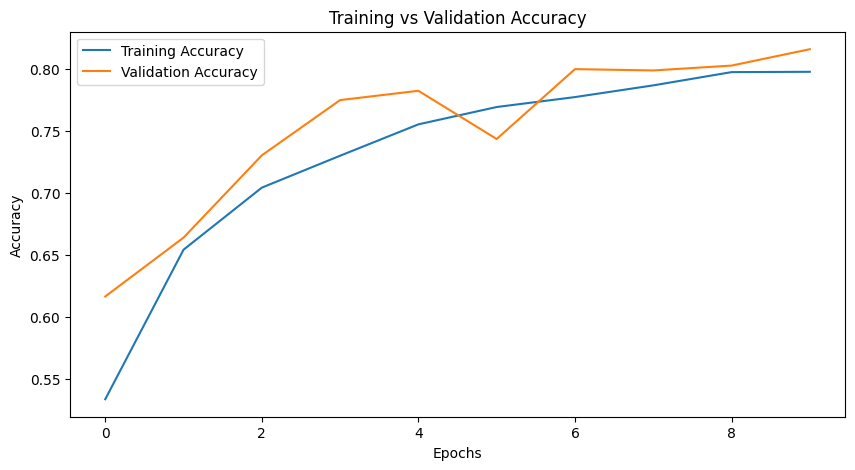

In [14]:
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


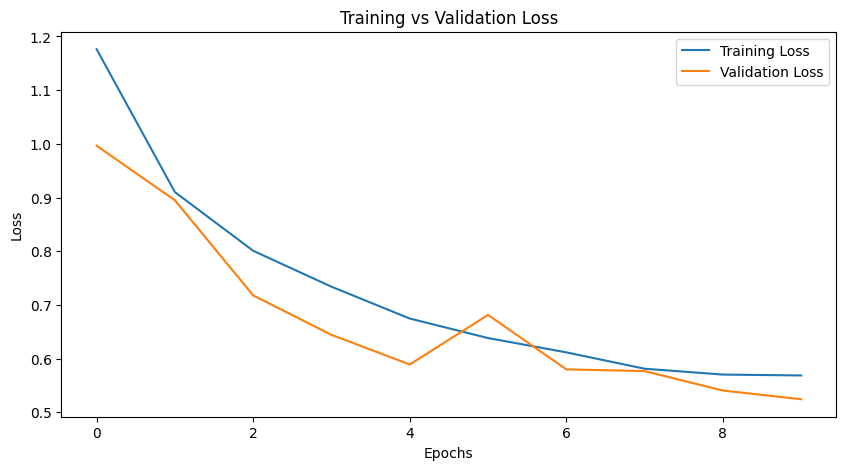

In [15]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 21s 224ms/step


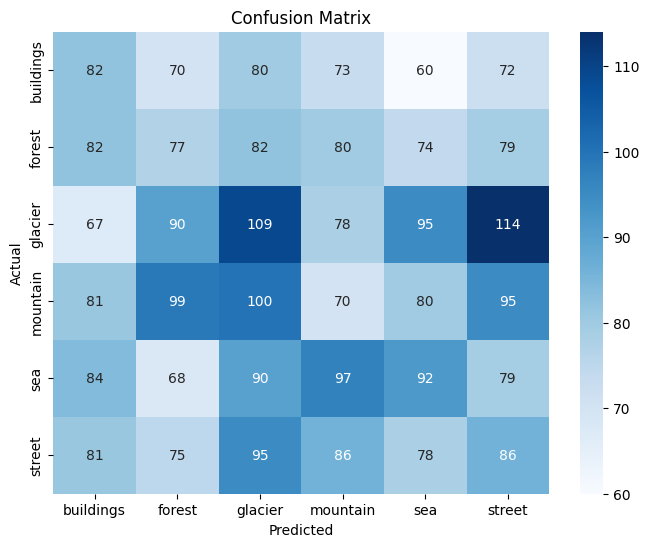

In [16]:
# Get true labels and predictions
y_true = test_generator.classes
y_pred = np.argmax(cnn_model.predict(test_generator), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [17]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 81.10%
